<a href="https://colab.research.google.com/github/ameyvadnere/CS418-Statistical-Pattern-Recognition-Lab/blob/master/Assn1_Q1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras.datasets import mnist
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [7]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X.reshape(60000, 784)/255.
test_X = test_X.reshape(10000, 784)/255.

In [4]:
def compute_covs_means(train_X, train_y, classes=list(range(10))):
    means = []
    covs = []
    cov_invs = []
    cov_dets = []
    priors = []
    k = train_X.shape[1]

    for i in tqdm(range(len(classes))):
        filter = np.where(train_y == classes[i])
        X = train_X[filter]

        mean_array = np.mean(X, axis=0)
        cov_matrix = np.cov(X, rowvar=False) #* np.eye(k)  + np.eye(k) * 10 ** (8/k) 
        det_cov = np.linalg.det(cov_matrix)
        cov_inv = np.linalg.pinv(cov_matrix)
        count = X.shape[0]

        means.append(mean_array)
        covs.append(cov_matrix)
        cov_invs.append(cov_inv)
        cov_dets.append(det_cov)
        priors.append(count/train_X.shape[0])

    return means, covs, cov_invs, cov_dets, priors

In [5]:
means, covs, cov_invs, cov_dets, priors = compute_covs_means(train_X, train_y)

for i in range(10):
    print(covs[i].min(), covs[i].max(), cov_dets[i])


-0.1203365661591198 0.19658336141888547 0.0
-0.13371108006277452 0.20122757963778534 0.0
-0.11257119984056298 0.19904993553228925 0.0
-0.11593709688378079 0.19281588029681673 0.0
-0.1117850290817117 0.19330632796399785 0.0
-0.10348910532922505 0.19328655523336633 0.0
-0.10993463258073453 0.19184940781407972 0.0
-0.11283245358780834 0.1938391033671761 0.0
-0.08791425387241933 0.18888960149081094 0.0
-0.11083755167989517 0.19194328090088283 0.0


In [36]:
def show_means(means):
    fig = plt.figure(figsize=(10,10))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(len(means)):
        
        ax = fig.add_subplot(4, 3, i+1, xticks=[], yticks=[])
        ax.imshow(means[i].reshape(28,28))
    
    plt.show()

def show_covs(covs):
    fig = plt.figure(figsize=(10,10))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(len(covs)):
        
        ax = fig.add_subplot(4, 3, i+1, xticks=[], yticks=[])
        ax.imshow(covs[i])
    
    plt.show()

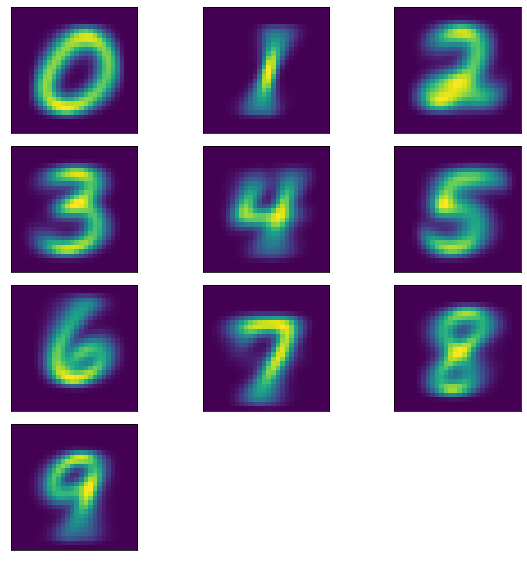

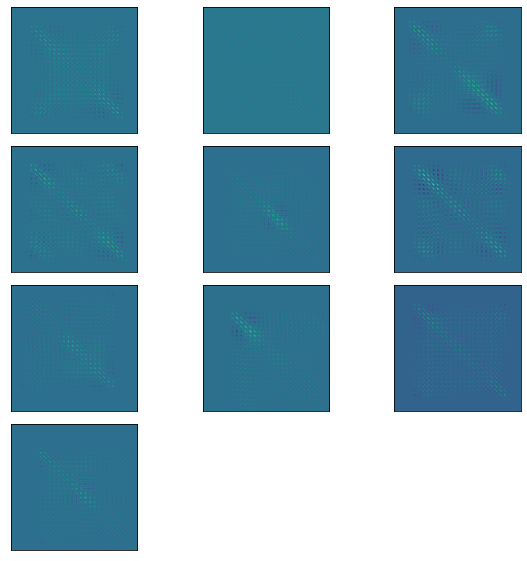

In [37]:
show_means(means)
show_covs(covs)

In [42]:
def posterior(X, i):

    mean, cov, cov_inv, cov_det, prior = means[i], covs[i], cov_invs[i], cov_dets[i], priors[i]
    numerator = np.exp(-0.5 * np.diagonal(((X - mean.T) @ cov_inv) @ (X - mean.T).T))
    denominator = np.sqrt(cov_det) + 1e-8

    return numerator/denominator * prior

In [43]:
def predict(X):
    posteriors = []
    for i in range(0,10):
        probs = posterior(X, i)
        # if prob > 0.5:
        #     return i
        posteriors.append(probs)
    
    print("Posterior shape ", np.array(posteriors).shape)
    return np.argmax(posteriors, axis=0)


In [44]:
preds = predict(test_X)

Posterior shape  (10, 10000)


In [45]:
preds

array([7, 2, 1, ..., 4, 5, 6])

In [46]:
print(np.mean(preds == test_y))

0.846


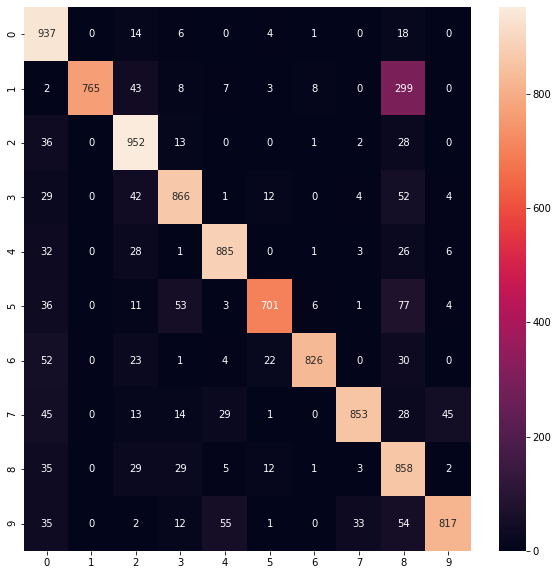

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, preds)
np.unique(preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f')

In [48]:
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(train_X, train_y).predict(test_X)
print("Number of mislabeled points out of a total %d points : %d"
      % (test_X.shape[0], (test_y != y_pred).sum()))

Number of mislabeled points out of a total 10000 points : 4442
